<center>
<font size='7' style="color:#0D47A1">  <b>INTRODUCTION TO <br> <br>QUANTUM COMPUTING AND <br><br> TOPICS ABOUT QUANTUM-ASSISTED <br><br>MACHINE LEARNING</b></font>
</center>

<hr style= "height:3px;">
<br>

Quantum computing is one approach to obtain answer that classical conventional computer cannot easily handle or intractable at all. Using the power of superposition and entanglement (will explain later) of quantum system, quantum algorithms have the potential to provide speed-up (exponential or quadratic) over classical algorithms. For now, the existing quantum devices are not identified as universal quantum computer, but have their own advantages over conventional computers. The topic about quantum-assisted machine learning is also drawing attentions from different aspects.

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>1. Background</b></font>

This section will introduce some of the basic concept from quantum mechanics and then roam into the quantum computation.

<br>
<br>
<font size='5' style="color:#4CAF50">  <b>1.1 Qubit</b></font>

In general, any two-level quantum system can be treated as a qubit, with a clear definition of two quantum state $|0\rangle$ and $|1\rangle$. Similar to classical bits (eg. on/off, high voltage/low voltage as 0/1), there are lots of systems can realise such system, for example, the spin of atoms or electrons (up/down), or the occupation number of fermions in optical lattices (0/1). For now, there are several major directions to realise quantum computer like ultra-cold atom in optical lattices, trapped ions, photons.

We noted the states $|0\rangle$ and $|1\rangle$ as:

\begin{equation}
| 0 \rangle = \begin{pmatrix}
 1 \\ 0
\end{pmatrix}
\qquad
| 1 \rangle = \begin{pmatrix}
 0 \\ 1
\end{pmatrix}
\end{equation}

$| i \rangle$ is called "ket", and $\langle i | = | i \rangle^\dagger $ is called "bra". The states form an orthonormal basis of the Hilbert space $\langle i | j \rangle = \delta_{i,j}$

<br>
<br>
<font size='5' style="color:#4CAF50">  <b>1.2 Pauli Matrices</b></font>

The Pauli matrices, defined as below, is a set of unitary ($U  U^\dagger = U^\dagger U = \mathcal{1}$) and Hermitian ($U^\dagger = U$) $2\times2$ complex matrices.

\begin{equation}
\sigma_x = 
\begin{pmatrix}
0 & 1 \\1 & 0
\end{pmatrix}
\qquad
\sigma_y = \begin{pmatrix}
0 & -i \\i & 0
\end{pmatrix}
\qquad\sigma_z = \begin{pmatrix}
1 & 0 \\0 & -1
\end{pmatrix}
\end{equation}

It is straight-forward that $|0\rangle$ and  $|1\rangle$ are the eigenstates of Pauli-Z matrix $\sigma_z$, i.e. $\sigma_z |0\rangle = |0\rangle$ and $\sigma_z |1\rangle = - |1\rangle$

The expectation value of an operator in specific state can be calculated as $\langle i | O | i \rangle$. An Hermitian operator has a real expectation value, $(\langle i | O | i \rangle)^* = (\langle i | O^\dagger | i \rangle) = \langle i | O | i \rangle$, and we call it an observable.

<br>
<br>
<font size='5' style="color:#4CAF50">  <b>1.3 Superposition of quantum states</b></font>

One quantum state can be written as the superposition of other quantum states with complex coefficients. The interpretation is to represent this state in another orthonormal space.

\begin{equation}
|\psi\rangle = \sum_i \alpha_i |\phi_i \rangle
\end{equation}
with
$\sum_i |\alpha_i|^2 =1$. $|\alpha_i|^2$ is the probability that the system is in the particular state $|\phi_i \rangle$.

Here I would introduce another important set of states which is the superposition of $|0\rangle$ and $|1\rangle$,

\begin{equation}
| + \rangle = \frac{1}{\sqrt{2}} \left( |0\rangle + |1\rangle \right)
\qquad
| - \rangle = \frac{1}{\sqrt{2}} \left( |0\rangle - |1\rangle \right)
\end{equation}

which are the eigenstates of Pauli-X matrix

<br>
<br>
<font size='5' style="color:#4CAF50">  <b>1.4 Bloch Sphere</b></font>

The bloch sphere is one way to visualise the state of one qubit. A general state of one qubit can be written as,

\begin{equation}
| \psi \rangle = \cos(\theta/2) | 0 \rangle + \sin(\theta/2) e^{i \phi} | 1 \rangle
\end{equation}

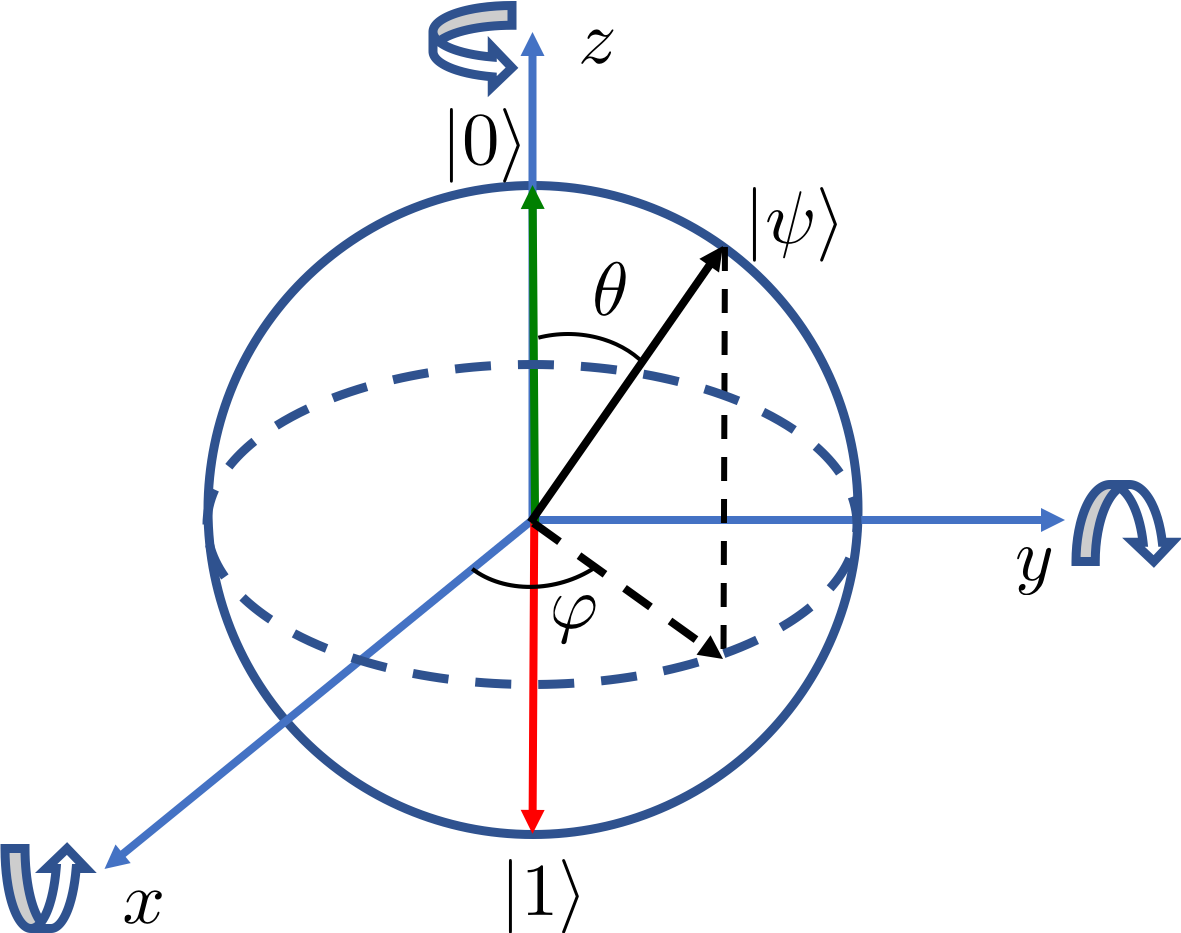

In [1]:
from IPython.display import Image
Image("blochsphere.png")

And the $|+\rangle$ and $| - \rangle$ states are sit on X-axis.

<br>
<br>
<font size='5' style="color:#4CAF50">  <b>1.5 Entanglement</b></font>

Entanglement is a quantum feature of a system of multiple qubits. A entangled state cannot be separated, which means the system cannot be expressed as two independent subsystem.
\begin{equation}
| \psi \rangle \neq | \psi_A \rangle \otimes | \psi_B \rangle
\end{equation}

One example of entangled states is a Bell state:
\begin{equation}
| \psi \rangle = \frac{1}{\sqrt{2}} \Big( | 0_A 0_B \rangle + | 1_A 1_B \rangle \Big)
\end{equation}

### 1.5.1 Density operator and von Neumann entropy
The density operator is useful to describe a statistical system in general. It has the definition as
\begin{equation}
\rho = \sum_i^n p_i | \psi_i \rangle \langle \psi_i |
\end{equation}

where $n \ge 1$, and $p_i$ is the probability of being in the state of $| \psi_i \rangle$. When $n=1$, the system is consider a pure state, or a mixed state otherwise. The trace of a density matrix is always one $tr(\rho)=1$, and a pure state also satisfies the condition that $\rho = \rho^2$.

The von Neumann entropy is defined as,
\begin{equation}
S_{vN}(\rho) = - tr(\rho \ln \rho)
\end{equation}

and it is easy to prove that the entropy of a pure state is zero.

The entropy of a subsystem is also related to measure entanglement to the rest of the system. To obtain the density matrix of a subsystem, we can "trace over" the rest of the system (sometime called environment). Consider a  system $\rho$, consists two subsystem A and B.

\begin{align}
\rho_A &= tr_B (\rho) \\
&= \sum_j^{dim(B)} \langle \phi_j | \rho | \phi_j \rangle
\end{align}

> HW: A non-entangled state, in the form of $| \psi \rangle = | \psi_A \rangle \otimes | \psi_B \rangle$, has a density operator of the subsystem A as $\rho_A = | \psi_A \rangle \langle \psi_A |$, and the entropy is zero.

For an entangled state like a Bell state, $| \psi \rangle = \frac{1}{\sqrt{2}} \Big( | 0_A 0_B \rangle + | 1_A 1_B \rangle \Big)$, the density operator of system is:

\begin{align}
\rho &= | \psi \rangle \langle \psi | \\
&= \frac{1}{2} \left( | 0_A 0_B \rangle \langle 0_A 0_B| +| 0_A 0_B \rangle \langle 1_A 1_B| +| 1_A 1_B \rangle \langle 0_A 0_B| +| 1_A 1_B \rangle \langle 1_A 1_B| \right) \\
\rho_A &= \langle 0_B | \rho | 0_B \rangle + \langle 1_B | \rho | 1_B \rangle \\
&= \frac{1}{2} \left( | 0_A \rangle \langle 0_A | +  | 1_A \rangle \langle 1_A | \right)
\end{align}

thus, the von Neumann entropy is $S_{vN}(\rho_A) = - 1/2 \ln (1/2) - 1/2 \ln (1/2) = ln 2$. 

<br>
<br>
<font size='5' style="color:#4CAF50">  <b>1.6 Quantum Gates</b></font>

### 1.6.1  Single-qubit gates
A unitary matrix acts on one qubit is called single-qubit operation, or single-qubit gate. It is considered a rotation of a vector on Bloch sphere, transfer the state vector to a new position. For example, the Hadamard gate, expressed as below, transfer between $| 0 \rangle \leftrightarrow | + \rangle$, and $| 1 \rangle \leftrightarrow | - \rangle$

\begin{equation}
H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\ 1 & -1
\end{pmatrix}
\end{equation}

which can be consider as a rotation with respect to $45^\circ$ axis on X-Z plane. 

Applying a gate that is unitary and Hermitian twice in a row will always gives you the identity matrix, and this feature can be used to simplify the circuit to prevent error of implementation.

### 1.6.2 Two-qubit gates
The operation acts on two qubits are always commonly used in quantum circuits. Utilizing two-qubit gates and single-qubit gates, an arbitrary quantum operation on multiple qubits can be approximated to an arbitrary accuracy, and those sets of gates are considered universal. One type of two-qubit gates plays an important role, controlled gate. A controlled gate, using one qubit as the control qubit and determine an operation on the target state. The operation will apply to the target state only if the control qubit is in $| 1 \rangle$ 
\begin{equation}
^cU  | 0 a \rangle = | 0 a \rangle \qquad ^cU  | 1 a \rangle = | 1 \rangle U | a \rangle
\end{equation}

I will introduce one important two-qubit gate, controlled-Not gate (CNOT).
\begin{equation}
\rm{CNOT}  | 0 a \rangle = | 0 a \rangle \qquad \rm{CNOT}  | 1 a \rangle = | 1 \bar{a} \rangle
\end{equation}

>HW: Try to prepare a Bell state mentioned above on two qubit, using CNOT. What about a quantum operation that swap the state of two qubit?

<br>
<br>
<font size='5' style="color:#4CAF50">  <b>1.7 Quantum Circuits</b></font>

Quantum circuits represent a set of sequential quantum gates on qubits to perform quantum computation. 

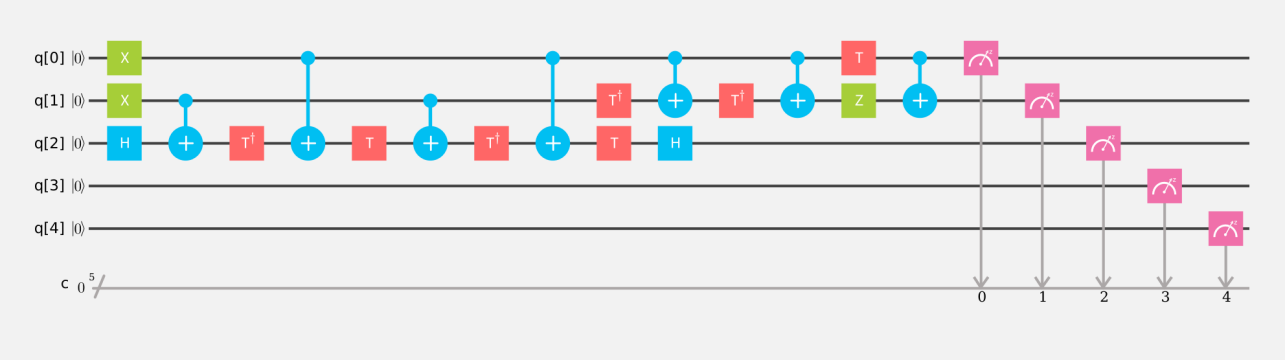

In [2]:
Image("qAdder.png")

Here is an example from [IBM Q Experience](https://quantumexperience.ng.bluemix.net/qx/editor), performing 1+1 = 10.

<br>
<br>
<font size='5' style="color:#4CAF50">  <b>1.8 IBM Q Experience</b></font>

The IBM Q Experiece is open to public where people can build the quantum circuit like lego. The quantum device as a bowtie architecture with 5 qubits. It is not a fully connected device which means the controlled gate can be implemented within some limitation. Nevertheless, it is a nice playground to start.

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>2. Hamiltonian Model</b></font>

Besides the quantum circuit, there is another model to conduct quantum computing, Hamiltonian model. From the Schrodinger equation with time-independent Hamiltonian H:
\begin{equation}
i \hbar \frac{\partial}{\partial t} | \psi \rangle = \hat{H} | \psi \rangle
\end{equation}
we can consider the system is undergoing a unitary transformation:
\begin{equation}
| \psi(t) \rangle = \exp \big(-\frac{i}{\hbar} \hat{H} t\big) | \psi(0) \rangle
\end{equation}
For a time-dependent Hamiltonian H(t), the system will undergo a path instead of an arc in Hilbert space. 

>HW: what is the corresponding equation of motion of density matrix described by the Schrodinger equation?

<br>
<br>
<font size='5' style="color:#4CAF50">  <b>2.1 Adiabatic Quantum Computing (AQC)</b></font>

Adiabatic quantum computing is based on the adiabatic theorem of quantum mechanics, stating that if the initial state is one of the eigenstate of initial Hamiltonian, the system will remain in that eigenstate if the system undergoes small perturbation. In another expression, if the system is time-dependent and changing slowly that the difference can be treated as perturbations, the system will remain in instantaneous eigenstate of this Hamiltonian.

For example, if the system is in the ground state (lowest energy state) of Hamiltonian H(0), as the Hamiltonian H(t) changes slowly enough, the system is always be in ground state. Here the fidelity is defined as $F(| a \rangle, | b \rangle ) = | \langle a | b \rangle | ^2$. 

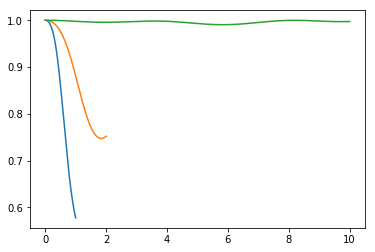

In [1]:
## Example of adiabatic state transformation

import numpy as np
from numpy import linalg as LA
from scipy.linalg import expm
import matplotlib.pyplot as plt
%matplotlib inline 

T_total = [1, 2, 10]
dt = 0.001

px = np.matrix([[0,1],[1,0]])
pz = np.matrix([[1,0],[0,-1]])
psi0 = np.matrix([1/np.sqrt(2),1/np.sqrt(2)])
psi0 = psi0.T

for T_tot in T_total:
    q = int(T_tot/dt)
    F = np.zeros(q)
    time_step = np.zeros(q)
    phi = psi0
    for i in range(q):
        H = (1-(i+1)/q)*px + (i+1)/q*pz  
        phi = expm(-1j*H*dt)*phi
        E , VE = LA.eig(H)
        F[i] = (np.absolute(VE[:,0].T*phi))**2
        time_step[i] = i*dt
 
    plt.plot(time_step,F)



In this example, the time-dependent Hamiltonian is written as a linear interpolation of initial Hamiltonian and final Hamiltonian, which is straight-forward and commonly used, but not optimised. The AQC requires several conditions:
1. The initial stae is easy to prepare
2. The time-dependent Hamiltonian is well-defined
3. The chaning speed of Hamiltonian shall be slow
As shown above, if the chaning speed is too fast (total ramping time is to short), the final state is far away from correct answer. Depending on the answer encoded in the target quantum state, the AQC can obtain the correct answer for large system problems.

This technique can also be used to prepare a required state for further experiements, known as the adiabatic state preparation.

However, the feature of system staying in the eigenstates can be hard to handle. During the ramping, if the system is excited to another eigenstate, it can be trapped in that state and therefore results in a poor fidelity. An open question is to determine an optimal ramping (other than linear interpolation) with minimal knowledge.

<br>
<br>
<font size='5' style="color:#4CAF50">  <b>2.2 Quantum annealing and D-Wave system</b></font>

The interest of quantum devices to realise universal quantum computers is constantly under developing. There are several requirements for a practical quantum computer:
1. the ability to increase the number of qubits (scalable quantum computer)
2. qubits can be well prepared to arbitrary state (initial condition)
3. longer decoherence time than gate implementation time (long life-time of system to perform reasonable number of operations)
4. universal gate set 
5. the ability to retrieve classical information from qubits.

For now there are several candidate platforms of physical system, and each of them has their own strength and weakness. A quantum system designed to solve specific problems are usually called a quantum simulator. In particular, we will introduce the quantum annealer from D-Wave for quantum assisted/enhanced machine learning.

### 2.2.1 The Hamiltonian of D-Wave system
The core of the D-Wave system is the AQC. The system has a well defined Hamiltonian as:

\begin{equation}
H_{dw}(t) = A(t) \sum_i a_i \sigma_x^i + B(t) \left( \sum_i b_i \sigma_z^i + \sum_{i,j} c_{ij} \sigma_z^i \sigma_z^j \right)
\end{equation}

with time-dependent function $A(t), B(t)$ to control the initial Hamiltonian and final Hamiltonian. In their system, $A(0) \gg B(0)$, and at the "end", $A(T) \ll B(T)$.

With the initial quantum state $| + + ... +\rangle $, which is the ground state of $\sum_i a_i \sigma_x^i$, the $B(t)$ is tuned up so the system will undergo adiabatic ramping into the ground state of $\sum_i b_i \sigma_z^i + \sum_{i,j} c_{ij} \sigma_z^i \sigma_z^j$. 

In another word, this system is designed to find the minimal value of an energy(cost) function of so-call Ising model:

\begin{equation}
E_{ising} = \sum_i b_i S^i + \sum_{i,j} c_{ij} S^i S^j
\end{equation}
where $S^i \in \{-1, +1\}$

Users have the control of input data ($b_i, c_{ij}$), and obtain corresponding configurations and energies with desired number of read-outs.

The energy function can be rewritten with a transformation $S = 2t -1$ to have a so-called quadratic unconstrained binary optimization (QUBO) format:

\begin{equation}
E_{QUBO} = \sum_i b'_i t^i + \sum_{i,j} c'_{ij} t^i t^j
\end{equation}
where $t^i \in \{0, 1\}$. This energy function covers a commonly used cost function in machine learning:

\begin{equation}
E = -\sum_i b_i v^i - \sum_i c_i h^i - \sum_{i,j} w_{ij} v^i h^j
\end{equation}
where $v^i, b_i$ are the visible nodes and bias, $h^j, c_j$ are the hidden nodes and bias, and $w_{ij}$ are weights. For a system with n bits, the Hilbert space is 2^n dimensional, and grows exponentially with the system size. In this situation, it is hard to find the ground state efficiently or the conventional classical computer might face memory issue.

### 2.2.2 Features of D-Wave system
As mentioned previously, the D-Wave system is designed to find a configuration which minimise a certain cost function, where the conventional computer finds intractable for large system. The information retrieved from D-Wave calculations are classical (configurations of +1/-1 or 0/1 with the corresponding energy). Another feature of D-Wave is the sampling probability is of Boltzmann distribution, i.e.:

\begin{align}
P(E_i) &= \frac{1}{\mathcal{Z}} \exp (- \beta E_i) \\
\mathcal{Z} &= \sum_i \exp (-\beta E_i)
\end{align}

Different from the physical definition of $\beta = 1/k_{B} T$, the $\beta$ here is corresponding to an effective temperature, or can be considered as a rescaling of energy.

>This feature of sampling can help dealing with Restriced Boltzmann machine (RBM) of large system size (large number of visible and hidden nodes). 

<br>
<br>
<font size='5' style="color:#4CAF50">  <b>2.3 Review of RBM</b></font>
 
The RBM a generative stochastic artificial neural network that can learn a probability distribution over its set of inputs. It is indeed a powerful tool for many problems like supervised learning and clustering. A bipartite graph without connections between same layer (shown below) is demonstrating "restricted" Boltzmann machine.

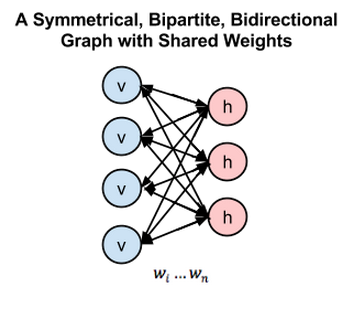

In [9]:
Image("RBM.png")

The joint probability distribution of $v,h$ is defined by a Gibbs distribution
\begin{equation}
P(v,h) = \frac{1}{\mathcal{Z}} \exp(-E(v,h))
\end{equation}
where 
\begin{equation}
E(v,h) = -\sum_i^n b_i v_i - \sum_i^m c_i h_i - \sum_{i,j}^{n,m} w_{ij} v_i h_j
\end{equation}
with $n$ visible nodes and $m$ hidden nodes.
The partition function is 

\begin{equation}
\mathcal{Z} = \sum_{\{v,h\}} \exp (-E(v,h))
\end{equation}

the forward and reverse conditional probability distributions for an RBM are both simple sigmoid functions:

\begin{equation}
P(h_j=1 | v) = sigm(c_j + \sum_i w_{ij} v_i) \\
P(v_i=1 | h) = sigm(b_j + \sum_i w_{ij} h_j)
\end{equation}

With a fixed training data V, the gradient of the log-likelihood with respect to the weights is:

\begin{equation}
\frac{\partial \log P}{\partial w_{ij}} = \langle v_i h_j \rangle_{data} - \langle v_i h_j \rangle_{model}
\end{equation}
The first term is the clamped expectation with V fixed and can be calculated efficiently. The second term is the expectation value over the joint probability distribution function mentioned before:
\begin{equation}
\langle v_i h_j \rangle_{model} = \frac{1}{\mathcal{Z}} \sum_{\{v,h\}} v_i h_j \exp (-E(v,h))
\end{equation}
This term is hard to obtain due to the difficulty of sampling all the configurations, Contrastive Divergence is used to compute the expectation value from model and to update the weights and biases.

<br>
<br>
<font size='5' style="color:#4CAF50">  <b>2.4 Quantum assisted process</b></font>

Combine the need from RBM and the feature from D-Wave sampling, the quantum annealer can be used to compute the expectation value from training model. It is easy to implement this process as the interface of D-Wave library is well connected with Python. The QUBO to feed in to the D-Wave can be defined as:

\begin{equation}
Q = \frac{1}{\beta}\begin{pmatrix}
B & W \\
0 & C
\end{pmatrix}
\end{equation}

where $B$ and $C$ are diagonal matrices with $b_i$ and $c_i$. $\beta$ is undetermined. The D-Wave will return configurations of vectors in $(n+m)$ dimension, $(v,h)$. Then the expectation value, $\langle v_i h_j \rangle_{model} $, can be calculated as,

\begin{equation}
\langle v_i h_j \rangle_{model} = \frac{1}{N_r}\sum_n^{N_r} v_i^{(n)} h_j^{(n)}
\end{equation}

When tackling a large system, the D-Wave sampling might be performing better calculations. 

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>3 Summary and Outlook</b></font>

Here we introduced fundamental concepts of quantum computation of circuit model and Hamiltonian model. Later, we build connection between machine learning and existing quantum devices for a quantum assisted process. There are lots of open questions about quantum computing and potential applications.